In [1]:
import pandas as pd, numpy as np
from datetime import datetime
pd.set_option('max_colwidth',200)
import yfinance as yf
import time, urllib
import glob
import os
import sys
sys.setrecursionlimit(10000) #例如这里设置为十万

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)


In [ ]:
def sp500():
    sp500_list = ['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AMD', 'HII', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'CBOE', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'GLW', 'COST', 'COTY', 'CCI', 'CSRA', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DOV', 'DWDP', 'DPS', 'DTE', 'DRE', 'DUK', 'DXC', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ETR', 'EVHC', 'EOG', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ES', 'RE', 'EXC', 'EXPE', 'EXPD', 'ESRX', 'EXR', 'XOM', 'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FISV', 'FLIR', 'FLS', 'FLR', 'FMC', 'FL', 'F', 'FTV', 'FBHS', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GD', 'GE', 'GGP', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GS', 'GT', 'GWW', 'HAL', 'HBI', 'HOG', 'HRS', 'HIG', 'HAS', 'HCA', 'HCP', 'HP', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HPQ', 'HUM', 'HBAN', 'IDXX', 'INFO', 'ITW', 'ILMN', 'IR', 'INTC', 'ICE', 'IBM', 'INCY', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IQV', 'IRM', 'JEC', 'JBHT', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KHC', 'KR', 'LB', 'LLL', 'LH', 'LRCX', 'LEG', 'LEN', 'LUK', 'LLY', 'LNC', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MAT', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM', 'KORS', 'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'TAP', 'MDLZ', 'MON', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MYL', 'NDAQ', 'NOV', 'NAVI', 'NTAP', 'NFLX', 'NWL', 'NFX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'PCAR', 'PKG', 'PH', 'PDCO', 'PAYX', 'PYPL', 'PNR', 'PBCT', 'PEP', 'PKI', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'RL', 'PPG', 'PPL', 'PX', 'PCLN', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RRC', 'RJF', 'RTN', 'O', 'RHT', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'COL', 'ROP', 'ROST', 'RCL', 'CRM', 'SBAC', 'SCG', 'SLB', 'SNI', 'STX', 'SEE', 'SRE', 'SHW', 'SIG', 'SPG', 'SWKS', 'SLG', 'SNA', 'SO', 'LUV', 'SPGI', 'SWK', 'SBUX', 'STT', 'SRCL', 'SYK', 'STI', 'SYMC', 'SYF', 'SNPS', 'SYY', 'TROW', 'TPR', 'TGT', 'TEL', 'FTI', 'TXN', 'TXT', 'TMO', 'TIF', 'TWX', 'TJX', 'TMK', 'TSS', 'TSCO', 'TDG', 'TRV', 'TRIP', 'FOXA', 'FOX', 'TSN', 'UDR', 'ULTA', 'USB', 'UA', 'UAA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VIAB', 'V', 'VNO', 'VMC', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'WEC', 'WFC', 'HCN', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYN', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']
    return sp500_list

def all_weather():
    all_weather_portfolio = ["VTI","TLT","IEF","GLD","DBC"]
    return all_weather_portfolio

def us_sectors_etf():
    us_sectors = ["IYM","IYZ","FCL","FCD","IYE","IYG","IYH","IYJ","IYR","IYW","IDU"]
    return us_sectors
    
def today_dt():
    today = str(datetime.now().date())
    return today

def download_yf_data(start, end, us_db_path, ticker_list):
    for ticker in ticker_list:
    #     print("testing")
        # Initial downloading:
        if not os.path.exists(us_db_path+ticker+".csv"):
            print("{} is new, start downloading now...".format(ticker))
            with eventlet.Timeout(60,False):
                try:
                    data = yf.download(ticker, start=start, end=end)
                    data.reset_index(inplace = True)
                    data['Ticker'] = ticker
                    data.to_csv(us_db_path+ticker+".csv", index = False)
                    print("{} data file created: {}".format(ticker, end))
                except Exception as e:
                    print(e)

    #         print("Timed Out: Download Failed!")
        # Check for updates:
        else:
            print("Already have data csv for {}".format(ticker))
            hist_data = pd.read_csv(us_db_path+ticker+".csv")
            try:
                hist_data_first_date = hist_data['Date'].values[0]
                if start >= hist_data_first_date:
                    hist_data_last_date = hist_data['Date'].values[-1]
                    if today > hist_data_last_date:
                        print("Needs to update, start updating new data for {} now...".format(ticker))
                        update_start = hist_data_last_date
                        update_end = today
                        with eventlet.Timeout(60,False):
                            try:
                                new_data = yf.download(ticker, start=update_start, end=update_end)
                                new_data.reset_index(inplace = True)
                                new_data['Ticker'] = ticker
                                new_data.to_csv(us_db_path+ticker+".csv", mode='a', header=False, index = False)
                                updated_duplicated_df = pd.read_csv(us_db_path+ticker+".csv")
                                updated_df = updated_duplicated_df.drop_duplicates("Date")
                                updated_df.sort_values("Date", inplace = True)
                                updated_df.to_csv(us_db_path+ticker+".csv", index = False)
                                print("New data updated till today for {}!".format(ticker))
                            except Exception as e:
                                print(e)
            #             print("Timed Out: Update Failed!")
                    else:
                        print("There's no new data to update for {}.".format(ticker))

                else:
                    print("Setup start date earlier than existing data's, trying to pull data from before...")
                    hist_data_last_date = hist_data['Date'].values[-1]
                    if today > hist_data_last_date:
                        print("Needs to update, start updating new data for {} now...".format(ticker))
                        update_start = start
                        update_end = today
                        with eventlet.Timeout(60,False):
                            try:
                                new_data = yf.download(ticker, start=update_start, end=update_end)
                                new_data.reset_index(inplace = True)
                                new_date = new_data['Date'].values[0]
                                print("New data's first pulled date is {}".format(new_date))
                                new_data['Ticker'] = ticker

                                new_data.to_csv(us_db_path+ticker+".csv", mode='a', header=False, index = False)
                                updated_duplicated_df = pd.read_csv(us_db_path+ticker+".csv")
                                updated_df = updated_duplicated_df.drop_duplicates("Date")
                                updated_df.sort_values("Date", inplace = True)
                                updated_df.to_csv(us_db_path+ticker+".csv", index = False)
                                print("New data updated till today for {}!".format(ticker))
                            except Exception as e:
                                print(e)
                    else:
                        print("There's no new data to update for {}.".format(ticker))
            except Exception as e:
                print(e)

    #     print("Data Download/Update for {} is Finished.".format(ticker))
        print("===============================================")
    print("【Updated Finished for today!】")


start = "2005-01-01"
today = today_dt()
end = today
us_db_path = "/Users/miaoyuesun/Code_Workspace/brad_public_workspace_mac/data/US_database/"
mkt_etf = ["SPY","VXXB","QQQ"]
other_tickers = ["YELP",'UBER','TSLA']
us_sectors = us_sectors_etf()
all_weather = all_weather()
sp500_stocks = sp500()
ticker_list = other_tickers

import eventlet
eventlet.monkey_patch()

download_yf_data(start, end, us_db_path, ticker_list)

Already have data csv for YELP
Setup start date earlier than existing data's, trying to pull data from before...
Needs to update, start updating new data for YELP now...


Exception in thread Thread-4:
Traceback (most recent call last):
  File "/Users/miaoyuesun/anaconda3/envs/py36/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/miaoyuesun/anaconda3/envs/py36/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/miaoyuesun/anaconda3/envs/py36/lib/python3.6/site-packages/multitasking/__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "/Users/miaoyuesun/anaconda3/envs/py36/lib/python3.6/site-packages/yfinance/multi.py", line 167, in _download_one_threaded
    actions, period, interval, prepost, proxy, rounding)
  File "/Users/miaoyuesun/anaconda3/envs/py36/lib/python3.6/site-packages/yfinance/multi.py", line 182, in _download_one
    rounding=rounding, many=True)
  File "/Users/miaoyuesun/anaconda3/envs/py36/lib/python3.6/site-packages/yfinance/base.py", line 150, in history
    data = _requests.get(url=url, params=params, proxies=p

In [8]:
ch_db_path = "/Users/miaoyuesun/Code_Workspace/brad_public_workspace_mac/data/CH_database/"

In [6]:
vix = yf.download("^VIX", start="2005-01-01", end="2020-04-05")

[*********************100%***********************]  1 of 1 completed


In [10]:
sh_index = pd.read_csv(ch_db_path+"sh000001.csv")

In [11]:
sh_index

,trade_date,open,high,low,close,volume,ts_code
0,1990-12-20,104.3000,104.3900,99.9800,104.3900,197.0,sh000001
1,1990-12-21,109.0700,109.1300,103.7300,109.1300,28.0,sh000001
2,1990-12-24,113.5700,114.5500,109.1300,114.5500,32.0,sh000001
3,1990-12-25,120.0900,120.2500,114.5500,120.2500,15.0,sh000001
4,1990-12-26,125.2700,125.2700,120.2500,125.2700,100.0,sh000001
...,...,...,...,...,...,...,...
7155,2020-03-30,2739.7191,2759.0989,2723.0543,2747.2138,239706604.0,sh000001
7156,2020-03-31,2767.3072,2771.1683,2743.1154,2750.2962,218598674.0,sh000001
7157,2020-04-01,2743.5409,2773.3641,2731.0794,2734.5215,217253427.0,sh000001
7158,2020-04-02,2720.2284,2780.6379,2719.9043,2780.6379,217864600.0,sh000001


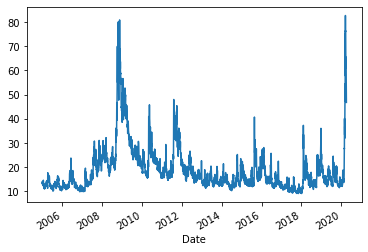

In [7]:
vix['Adj Close'].plot()

In [14]:
vix_close = vix[['Adj Close']]
sh_index_close = sh_index[['trade_date','close']]
vix_close.reset_index(inplace=True)
vix_close.columns = ['date', 'vix_close']
sh_index_close.columns = ['date','sh_close']
vix_close['date'] = vix_close['date'].astype(str)
vix_sh_close = vix_close.merge(sh_index_close, on = 'date')
vix_sh_close.set_index('date', inplace = True)

In [38]:
def two_graphs_twinx(series1, series2):
    fig = plt.figure(figsize = (30, 15))
    
    ax1 = fig.add_subplot(1, 1, 1)
    ax2 = ax1.twinx()
    
    series1.plot(ax = ax1, color = 'blue', lw = 2)
    series2.plot(ax = ax2, color = 'red', lw = 2)

#     ax1.axhline(0, color = 'blue', linestyle='--', lw=1)
#     ax2.axhline(0, color = 'red', linestyle='--', lw=1)

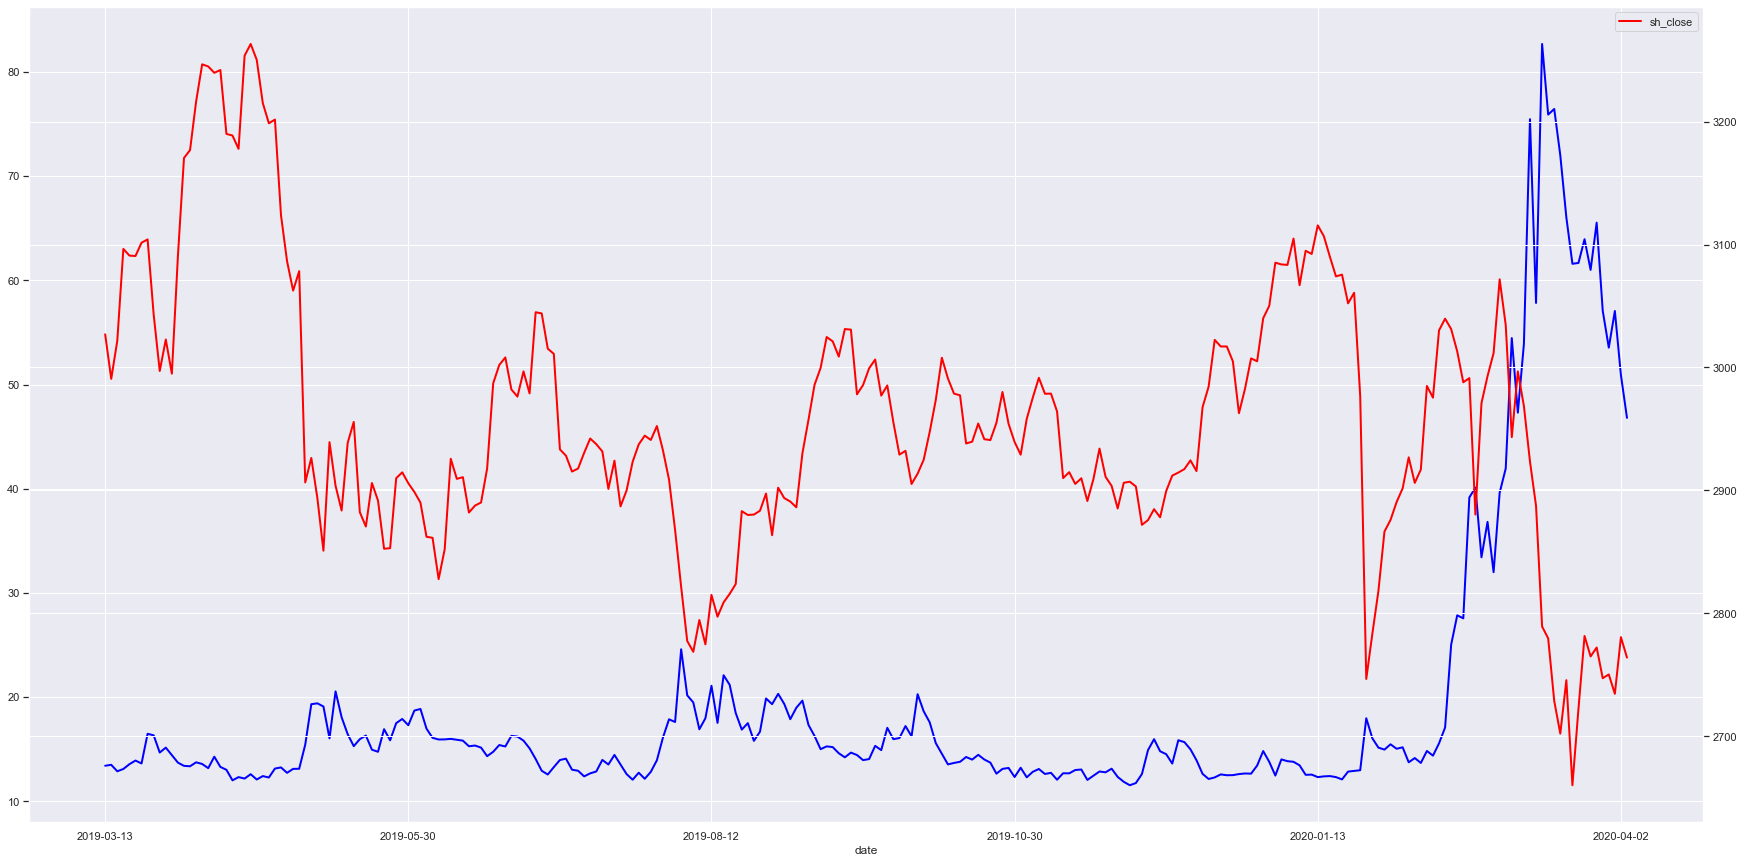

In [41]:
two_graphs_twinx(vix_sh_close['vix_close'].tail(252), vix_sh_close['sh_close'].tail(252))

In [42]:
vix_sh_close['vix_pct_chg'] = vix_sh_close['vix_close'].pct_change()
vix_sh_close['sh_pct_chg'] = vix_sh_close['sh_close'].pct_change()

In [44]:
vix_sh_close['sh_pct_chg_prev'] = vix_sh_close['sh_pct_chg'].shift(1)
vix_sh_close['sh_pct_chg_next'] = vix_sh_close['sh_pct_chg'].shift(-1)

In [53]:
vix_sh_close_tail252 = vix_sh_close.tail(252)

In [54]:
print("sh(t=-1) vs vix(t=0) returns' correlation: ")
print(vix_sh_close_tail252['vix_pct_chg'].corr(vix_sh_close_tail252['sh_pct_chg_prev']))
print("-------------")
print("sh(t=0) vs vix(t=0) returns' correlation: ")
print(vix_sh_close_tail252['vix_pct_chg'].corr(vix_sh_close_tail252['sh_pct_chg']))
print("-------------")
print("sh(t=1) vs vix(t=0) returns' correlation: ")
print(vix_sh_close_tail252['vix_pct_chg'].corr(vix_sh_close_tail252['sh_pct_chg_next']))

sh(t=-1) vs vix(t=0) returns' correlation: 
-0.01688723159326834
-------------
sh(t=0) vs vix(t=0) returns' correlation: 
-0.2656523466552111
-------------
sh(t=1) vs vix(t=0) returns' correlation: 
-0.16750023874690143
